In [1]:
# pandas
import pandas as pd

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

# Importing train-test-split 
from sklearn.model_selection import train_test_split

# Evaluation metrics
from sklearn.metrics import *

# Ignoring warning
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
titanic_df = pd.read_csv('Titanictrain.csv',index_col=0)
test_df = pd.read_csv('test.csv',index_col=0)
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
titanic_df.info()
print("----------------------------")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
----------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3

In [5]:
# drop unnecessary columns, these columns won't be useful in analysis and prediction
titanic_df = titanic_df.drop(['Name','Ticket'], axis=1)
test_df    = test_df.drop(['Name','Ticket'], axis=1)

In [6]:
df = pd.DataFrame(titanic_df.dtypes)
df['MissingVal'] = titanic_df.isnull().sum()
df['NUnique']=titanic_df.nunique()
df['Count']=titanic_df.count()
df

,0,MissingVal,NUnique,Count
Survived,int64,0,2,891
Pclass,int64,0,3,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Fare,float64,0,248,891
Cabin,object,687,147,204
Embarked,object,2,3,889


In [7]:
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
titanic_df.describe(include = 'object')

,Sex,Cabin,Embarked
count,891,204,889
unique,2,147,3
top,male,C23 C25 C27,S
freq,577,4,644


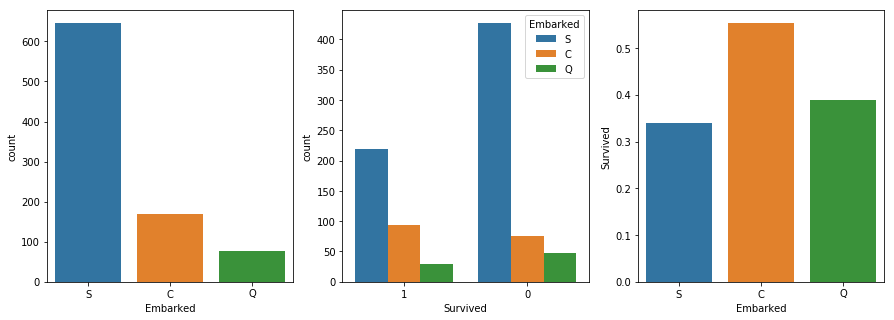

In [9]:
# Embarked

# only in titanic_df, fill the two missing values with the most occurred value, which is "S".
titanic_df["Embarked"] = titanic_df["Embarked"].fillna("S")

# plot
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))
sns.countplot(x='Embarked', data=titanic_df, ax=axis1)
sns.countplot(x='Survived', hue="Embarked", data=titanic_df, order=[1,0], ax=axis2)

# group by embarked, and get the mean for survived passengers for each value in Embarked
embark_perc = titanic_df[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_perc,order=['S','C','Q'],ax=axis3)

# Either to consider Embarked column in predictions,
# and remove "S" dummy variable, 
# and leave "C" & "Q", since they seem to have a good rate for Survival.

# OR, don't create dummy variables for Embarked column, just drop it, 
# because logically, Embarked doesn't seem to be useful in prediction.

embark_dummies_titanic  = pd.get_dummies(titanic_df['Embarked'])
embark_dummies_titanic.drop(['S'], axis=1, inplace=True)

embark_dummies_test  = pd.get_dummies(test_df['Embarked'])
embark_dummies_test.drop(['S'], axis=1, inplace=True)

titanic_df = titanic_df.join(embark_dummies_titanic)
test_df    = test_df.join(embark_dummies_test)

titanic_df.drop(['Embarked'], axis=1,inplace=True)
test_df.drop(['Embarked'], axis=1,inplace=True)

In [10]:
titanic_df.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

Only 38% of the passengers were survived, where as a majority 62% the passenger did not survive the disaster

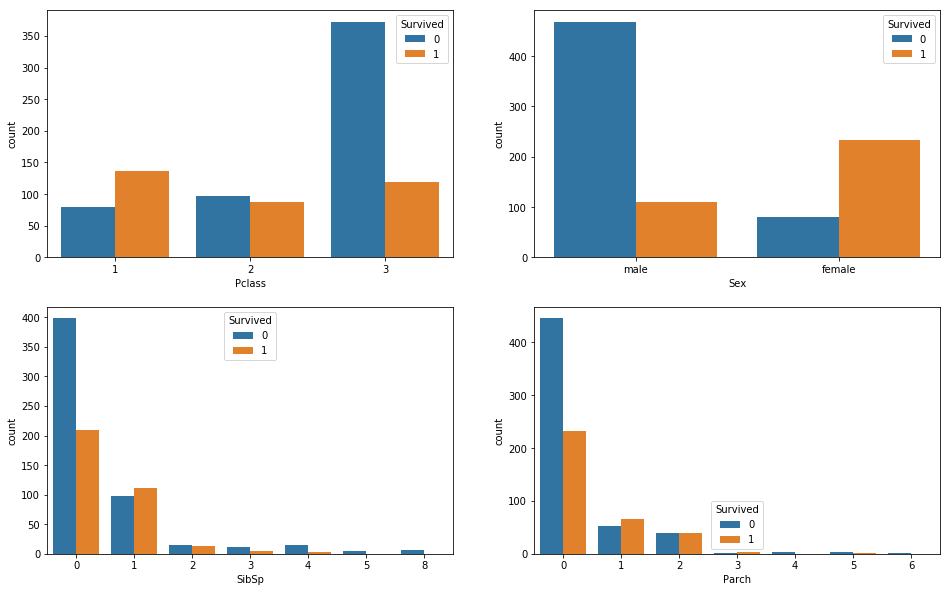

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
sns.countplot('Pclass',data=titanic_df,ax=axes[0,0],hue='Survived')
sns.countplot('Sex',data=titanic_df,ax=axes[0,1],hue='Survived')
sns.countplot('SibSp',data=titanic_df,ax=axes[1,0],hue='Survived')
sns.countplot('Parch',data=titanic_df,ax=axes[1,1],hue='Survived')

1) We can clearly see that male survial rates is around 20% where as female survial rate is about 75% which suggests that gender has a strong relationship with the survival rates.

2) There is also a clear relationship between Pclass and the survival by referring to first plot below. Passengers on Pclass1 had a better survial rate of approx 60% whereas passengers on pclass3 had the worst survial rate of approx 22%

In [12]:
# Fare

# only for test_df, since there is a missing "Fare" values
test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)

# convert from float to int
titanic_df['Fare'] = titanic_df['Fare'].astype(int)
test_df['Fare']    = test_df['Fare'].astype(int)

In [13]:
# Age (Treating Age null values)
# get average, std, and number of NaN values in titanic_df
average_age_titanic   = titanic_df["Age"].mean()
std_age_titanic       = titanic_df["Age"].std()
count_nan_age_titanic = titanic_df["Age"].isnull().sum()

# get average, std, and number of NaN values in test_df
average_age_test   = test_df["Age"].mean()
std_age_test       = test_df["Age"].std()
count_nan_age_test = test_df["Age"].isnull().sum()

# generate random numbers between (mean - std) & (mean + std)
rand_1 = np.random.randint(average_age_titanic - std_age_titanic, average_age_titanic + std_age_titanic, size = count_nan_age_titanic)
rand_2 = np.random.randint(average_age_test - std_age_test, average_age_test + std_age_test, size = count_nan_age_test)

# fill NaN values in Age column with random values generated
titanic_df["Age"][np.isnan(titanic_df["Age"])] = rand_1
test_df["Age"][np.isnan(test_df["Age"])] = rand_2

# convert from float to int
titanic_df['Age'] = titanic_df['Age'].astype(int)
test_df['Age']    = test_df['Age'].astype(int)

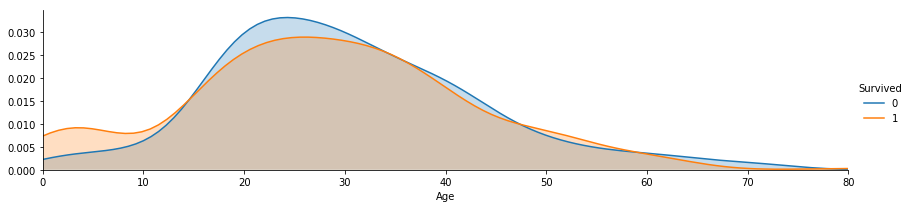

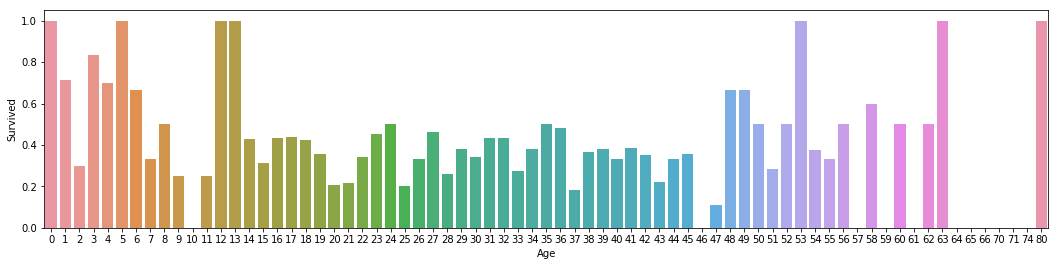

In [14]:
# peaks for survived/not survived passengers by their age
facet = sns.FacetGrid(titanic_df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, titanic_df['Age'].max()))
facet.add_legend()

# average survived passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = titanic_df[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)

In [15]:
# Cabin
# It has a lot of NaN values, so it won't cause a remarkable impact on prediction
titanic_df.drop("Cabin",axis=1,inplace=True)
test_df.drop("Cabin",axis=1,inplace=True)

In [16]:
# Family

# Instead of having two columns Parch & SibSp, 
# we can have only one column represent if the passenger had any family member aboard or not,
# Meaning, if having any family member(whether parent, brother, ...etc) will increase chances of Survival or not.
titanic_df['Family'] =  titanic_df["Parch"] + titanic_df["SibSp"]
titanic_df['Family'].loc[titanic_df['Family'] > 0] = 1
titanic_df['Family'].loc[titanic_df['Family'] == 0] = 0

test_df['Family'] =  test_df["Parch"] + test_df["SibSp"]
test_df['Family'].loc[test_df['Family'] > 0] = 1
test_df['Family'].loc[test_df['Family'] == 0] = 0

# drop Parch & SibSp
titanic_df = titanic_df.drop(['SibSp','Parch'], axis=1)
test_df    = test_df.drop(['SibSp','Parch'], axis=1)

In [17]:
# Sex

# As we see, children(age < ~16) on aboard seem to have a high chances for Survival.
# So, we can classify passengers as males, females, and child
def get_person(passenger):
    age,sex = passenger
    return 'child' if age < 16 else sex
    
titanic_df['Person'] = titanic_df[['Age','Sex']].apply(get_person,axis=1)
test_df['Person']    = test_df[['Age','Sex']].apply(get_person,axis=1)

# No need to use Sex column since we created Person column
titanic_df.drop(['Sex'],axis=1,inplace=True)
test_df.drop(['Sex'],axis=1,inplace=True)

# create dummy variables for Person column, & drop Male as it has the lowest average of survived passengers
person_dummies_titanic  = pd.get_dummies(titanic_df['Person'])
person_dummies_titanic.columns = ['Child','Female','Male']
person_dummies_titanic.drop(['Male'], axis=1, inplace=True)

person_dummies_test  = pd.get_dummies(test_df['Person'])
person_dummies_test.columns = ['Child','Female','Male']
person_dummies_test.drop(['Male'], axis=1, inplace=True)

titanic_df = titanic_df.join(person_dummies_titanic)
test_df    = test_df.join(person_dummies_test)

In [18]:
# Pclass
# create dummy variables for Pclass column, & drop 3rd class as it has the lowest average of survived passengers
pclass_dummies_titanic  = pd.get_dummies(titanic_df['Pclass'])
pclass_dummies_titanic.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_titanic.drop(['Class_3'], axis=1, inplace=True)

pclass_dummies_test  = pd.get_dummies(test_df['Pclass'])
pclass_dummies_test.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_test.drop(['Class_3'], axis=1, inplace=True)

titanic_df.drop(['Pclass'],axis=1,inplace=True)
test_df.drop(['Pclass'],axis=1,inplace=True)

titanic_df = titanic_df.join(pclass_dummies_titanic)
test_df    = test_df.join(pclass_dummies_test)

In [19]:
titanic_df.drop(['Person'],axis=1,inplace=True)
test_df.drop(['Person'],axis=1,inplace=True)

In [20]:
titanic_df.head()

,Survived,Age,Fare,C,Q,Family,Child,Female,Class_1,Class_2
PassengerId,,,,,,,,,,
1,0,22,7,0,0,1,0,0,0,0
2,1,38,71,1,0,1,0,1,1,0
3,1,26,7,0,0,0,0,1,0,0
4,1,35,53,0,0,1,0,1,1,0
5,0,35,8,0,0,0,0,0,0,0


##  Model building

In [21]:
X_train = titanic_df.drop("Survived",axis=1)
Y_train = titanic_df["Survived"]
X_test  = test_df.copy()

In [22]:
X_train.tail()

,Age,Fare,C,Q,Family,Child,Female,Class_1,Class_2
PassengerId,,,,,,,,,
887,27,13,0,0,0,0,0,0,1
888,19,30,0,0,0,0,1,1,0
889,27,23,0,0,1,0,1,0,0
890,26,30,1,0,0,0,0,1,0
891,32,7,0,1,0,0,0,0,0


In [23]:
def model(clf,X_train,Y_train):
    x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.30, random_state = 99)
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    print('Scores of the Model')
    print('Confusion Matrix of the model:')
    print(confusion_matrix(y_test,y_pred))
    print('-----------------------------------------')
    print('Accuracy Score:',accuracy_score(y_test,y_pred))
    print('-----------------------------------------')
    print('Classification report:')
    print(classification_report(y_test, y_pred))
    print('------------------------------------------')
    print('')
    print('Cross Validation using KFold:')
    kf = KFold(n_splits=5,random_state=99)
    print('Accuracy score using KFold cross validation:')
    score = cross_val_score(clf, X_train, Y_train, cv=kf, n_jobs=1)
    for i in score:
        print('cross_val_score:',i)
    print('Mean Acuuracy Score:',score.mean())

### Model using Logistic Regression

In [24]:
model(LogisticRegression(),X_train,Y_train)

Scores of the Model
Confusion Matrix of the model:
[[142  32]
 [ 32  62]]
-----------------------------------------
Accuracy Score: 0.7611940298507462
-----------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       174
           1       0.66      0.66      0.66        94

   micro avg       0.76      0.76      0.76       268
   macro avg       0.74      0.74      0.74       268
weighted avg       0.76      0.76      0.76       268

------------------------------------------

Cross Validation using KFold:
Accuracy score using KFold cross validation:
cross_val_score: 0.8100558659217877
cross_val_score: 0.8089887640449438
cross_val_score: 0.7808988764044944
cross_val_score: 0.7696629213483146
cross_val_score: 0.8258426966292135
Mean Acuuracy Score: 0.7990898248697509


### Model Using Gaussian Naive Bayes

In [25]:
model(GaussianNB(),X_train,Y_train)

Scores of the Model
Confusion Matrix of the model:
[[127  47]
 [ 27  67]]
-----------------------------------------
Accuracy Score: 0.7238805970149254
-----------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.82      0.73      0.77       174
           1       0.59      0.71      0.64        94

   micro avg       0.72      0.72      0.72       268
   macro avg       0.71      0.72      0.71       268
weighted avg       0.74      0.72      0.73       268

------------------------------------------

Cross Validation using KFold:
Accuracy score using KFold cross validation:
cross_val_score: 0.664804469273743
cross_val_score: 0.7696629213483146
cross_val_score: 0.7921348314606742
cross_val_score: 0.7247191011235955
cross_val_score: 0.8033707865168539
Mean Acuuracy Score: 0.7509384219446362


### Model building using KNN

#### Finding the best K value using GridsearchCV

In [29]:
params = params = {'n_neighbors': [1,2,3,4,5,6,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]}
grid_search_cv = GridSearchCV(KNeighborsClassifier(),params,verbose=1)

In [30]:
grid_search_cv.fit(X_train, Y_train)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:    2.0s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [31]:
grid_search_cv.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [34]:
model(KNeighborsClassifier(n_neighbors = 10 ),X_train,Y_train)

Scores of the Model
Confusion Matrix of the model:
[[149  25]
 [ 48  46]]
-----------------------------------------
Accuracy Score: 0.7276119402985075
-----------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.76      0.86      0.80       174
           1       0.65      0.49      0.56        94

   micro avg       0.73      0.73      0.73       268
   macro avg       0.70      0.67      0.68       268
weighted avg       0.72      0.73      0.72       268

------------------------------------------

Cross Validation using KFold:
Accuracy score using KFold cross validation:
cross_val_score: 0.6033519553072626
cross_val_score: 0.6573033707865169
cross_val_score: 0.7078651685393258
cross_val_score: 0.6685393258426966
cross_val_score: 0.7471910112359551
Mean Acuuracy Score: 0.6768501663423514


### Model using SVM

In [36]:
model(SVC(),X_train,Y_train)

Scores of the Model
Confusion Matrix of the model:
[[141  33]
 [ 40  54]]
-----------------------------------------
Accuracy Score: 0.7276119402985075
-----------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       174
           1       0.62      0.57      0.60        94

   micro avg       0.73      0.73      0.73       268
   macro avg       0.70      0.69      0.70       268
weighted avg       0.72      0.73      0.73       268

------------------------------------------

Cross Validation using KFold:
Accuracy score using KFold cross validation:
cross_val_score: 0.5921787709497207
cross_val_score: 0.6348314606741573
cross_val_score: 0.6853932584269663
cross_val_score: 0.7191011235955056
cross_val_score: 0.7303370786516854
Mean Acuuracy Score: 0.672368338459607


In [37]:
model(LinearSVC(),X_train,Y_train)

Scores of the Model
Confusion Matrix of the model:
[[143  31]
 [ 54  40]]
-----------------------------------------
Accuracy Score: 0.6828358208955224
-----------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.73      0.82      0.77       174
           1       0.56      0.43      0.48        94

   micro avg       0.68      0.68      0.68       268
   macro avg       0.64      0.62      0.63       268
weighted avg       0.67      0.68      0.67       268

------------------------------------------

Cross Validation using KFold:
Accuracy score using KFold cross validation:
cross_val_score: 0.6871508379888268
cross_val_score: 0.5112359550561798
cross_val_score: 0.7584269662921348
cross_val_score: 0.7528089887640449
cross_val_score: 0.7865168539325843
Mean Acuuracy Score: 0.6992279204067542


### Model Using Decision Tree

In [38]:
model(DecisionTreeClassifier(),X_train,Y_train)

Scores of the Model
Confusion Matrix of the model:
[[137  37]
 [ 36  58]]
-----------------------------------------
Accuracy Score: 0.7276119402985075
-----------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       174
           1       0.61      0.62      0.61        94

   micro avg       0.73      0.73      0.73       268
   macro avg       0.70      0.70      0.70       268
weighted avg       0.73      0.73      0.73       268

------------------------------------------

Cross Validation using KFold:
Accuracy score using KFold cross validation:
cross_val_score: 0.7877094972067039
cross_val_score: 0.7528089887640449
cross_val_score: 0.7808988764044944
cross_val_score: 0.7415730337078652
cross_val_score: 0.7808988764044944
Mean Acuuracy Score: 0.7687778544975206


#### Trying to find the best parameters for Decision tree

In [45]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(25, 100, 5),
    'min_samples_split': range(25, 100, 5),
    'criterion': ["entropy", "gini"],
    'max_features': ["auto","sqrt","log2"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,Y_train)

Fitting 5 folds for each of 2700 candidates, totalling 13500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 13500 out of 13500 | elapsed:  3.4min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['entropy', 'gini'], 'max_depth': range(5, 15, 5), 'min_samples_leaf': range(25, 100, 5), 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_split': range(25, 100, 5)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [46]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 30,
 'min_samples_split': 30}

In [47]:
model(DecisionTreeClassifier(criterion='entropy',max_depth=5,max_features='log2',min_samples_leaf=30,min_samples_split=30),
      X_train,Y_train)

Scores of the Model
Confusion Matrix of the model:
[[133  41]
 [ 30  64]]
-----------------------------------------
Accuracy Score: 0.7350746268656716
-----------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       174
           1       0.61      0.68      0.64        94

   micro avg       0.74      0.74      0.74       268
   macro avg       0.71      0.72      0.72       268
weighted avg       0.74      0.74      0.74       268

------------------------------------------

Cross Validation using KFold:
Accuracy score using KFold cross validation:
cross_val_score: 0.7932960893854749
cross_val_score: 0.7584269662921348
cross_val_score: 0.7528089887640449
cross_val_score: 0.7415730337078652
cross_val_score: 0.8033707865168539
Mean Acuuracy Score: 0.7698951729332747


### Model Using Random Forest

In [40]:
model(RandomForestClassifier(),X_train,Y_train)

Scores of the Model
Confusion Matrix of the model:
[[148  26]
 [ 33  61]]
-----------------------------------------
Accuracy Score: 0.7798507462686567
-----------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       174
           1       0.70      0.65      0.67        94

   micro avg       0.78      0.78      0.78       268
   macro avg       0.76      0.75      0.75       268
weighted avg       0.78      0.78      0.78       268

------------------------------------------

Cross Validation using KFold:
Accuracy score using KFold cross validation:
cross_val_score: 0.770949720670391
cross_val_score: 0.7865168539325843
cross_val_score: 0.7865168539325843
cross_val_score: 0.7808988764044944
cross_val_score: 0.8146067415730337
Mean Acuuracy Score: 0.7878978093026175


#### Trying to find the best parameters for Random Forest

In [53]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(2, 32, 10),
    'min_samples_split': range(2, 32, 10),
    'criterion': ["entropy", "gini"],
    'max_features': ["auto","sqrt","log2"]
}

n_folds = 5

# Instantiate the grid search model
forest = RandomForestClassifier()
grid_search = GridSearchCV(estimator = forest, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,Y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:   40.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['entropy', 'gini'], 'max_depth': range(5, 15, 5), 'min_samples_leaf': range(2, 32, 10), 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_split': range(2, 32, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [54]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [55]:
model(RandomForestClassifier(criterion='entropy',max_depth=10,max_features='auto',min_samples_leaf=2,min_samples_split=2),X_train,Y_train)

Scores of the Model
Confusion Matrix of the model:
[[145  29]
 [ 35  59]]
-----------------------------------------
Accuracy Score: 0.7611940298507462
-----------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       174
           1       0.67      0.63      0.65        94

   micro avg       0.76      0.76      0.76       268
   macro avg       0.74      0.73      0.73       268
weighted avg       0.76      0.76      0.76       268

------------------------------------------

Cross Validation using KFold:
Accuracy score using KFold cross validation:
cross_val_score: 0.776536312849162
cross_val_score: 0.797752808988764
cross_val_score: 0.8033707865168539
cross_val_score: 0.8033707865168539
cross_val_score: 0.8595505617977528
Mean Acuuracy Score: 0.8081162513338773


### Comparision of mean cross val score of Different models

In [72]:
score_df = pd.DataFrame(columns = ['model','score'])
score_df['model'] = ['Logistic Regression','Naive Bayes','KNN Classifier','SVC','LinearSVC','Decision Tree','Random Forest']

In [73]:
score_df['score']=[0.7990898248697509,0.7509384219446362,0.6768501663423514,0.672368338459607,0.6992279204067542,0.7878978093026175,0.8081162513338773]

In [74]:
score_df

,model,score
0,Logistic Regression,0.799090
1,Naive Bayes,0.750938
2,KNN Classifier,0.676850
3,SVC,0.672368
4,LinearSVC,0.699228
5,Decision Tree,0.787898
6,Random Forest,0.808116


### Predicting the test file using best model from the above comparision

In [56]:
rf = RandomForestClassifier(criterion='entropy',max_depth=10,max_features='auto',min_samples_leaf=2,min_samples_split=2)
rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [58]:
smaple_submission =pd.read_csv('Titanic_survival.csv')
y_final_pred = rf.predict(X_test)

In [59]:
submission = pd.DataFrame({
        "PassengerId": smaple_submission["PassengerId"],
        "Survived": y_final_pred
    })
submission.to_csv('submission_file.csv', index=False)